In [13]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(context="paper",style="white",font_scale=1.5)
import matplotlib as mpl

In [14]:
mean_df = pd.read_csv('data/ShockRespVoxelwiseCluster.csv')
t = mean_df.Time.unique()

clust_names = ['L Inferior frontal gyrus/\nprecentral gyrus',
               'L Dorsomedial prefrontal\n cortex',
               'L Inferior temporal/\noccipital gyrus',
               'L Middle frontal gyrus/\nprecentral gyrus (frontal eye field)',
               'L Anterior intraparietal\n sulcus',
               'L Anterior insula',
               'L Posterior intraparietal\n sulcus',
               'R Posterior cingulate\n cortex',
               'R Superior lobule',
               'L Caudate',
               'R Cerebellum (lobule VI)',
               'L Putamen',
               'L Superior parietal lobule',
               'R Cerebellum (lobule VIIb)',
               'R Middle occipital gyrus',
               'L Middle/\n inferior occipital gyrus',
               'L Inferior frontal gyrus',
               'R Fusiform gyrus (1)',
               'R Fusiform gyrus (2)',
               'L Anterior cingulate\n cortex',
               'R Middle cingulate cortex']

In [15]:
cmap = plt.get_cmap('Set1')
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7

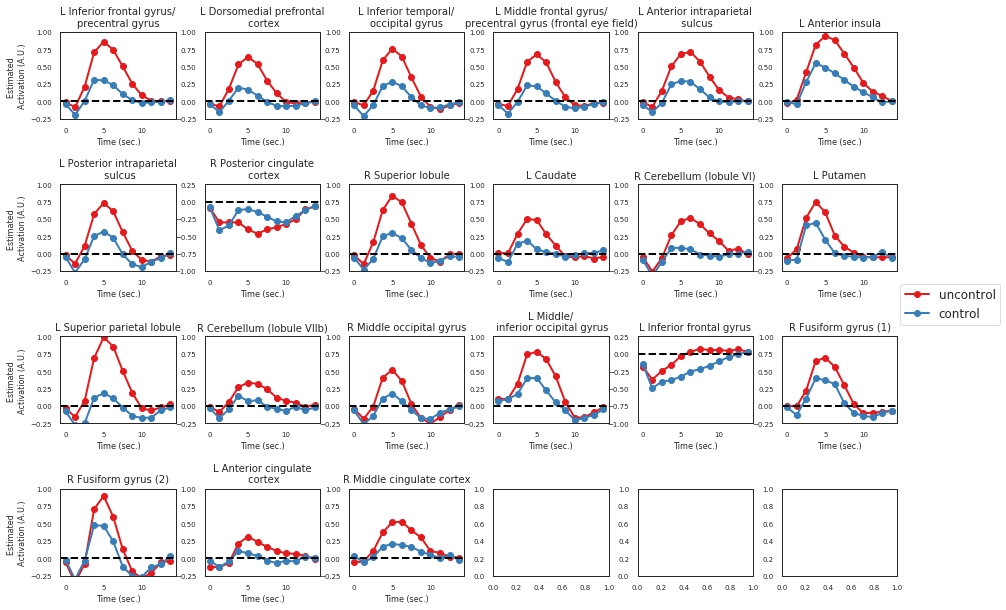

In [19]:
k_cols = 6
fig, axes = plt.subplots(ncols=k_cols,nrows=4,figsize=(15,10))
axes = axes.ravel()
plt.subplots_adjust(hspace=0.75,wspace=0.25)
for i, ax in enumerate(axes[:21]):
    ax.plot(t,mean_df[mean_df.Group == 'uncontrol'][clust_names[i]],
            color=cmap.colors[0],linewidth=2,
            marker='o',
            label='uncontrol',
            markersize=6)

    ax.plot(t,mean_df[mean_df.Group == 'control'][clust_names[i]],
            color=cmap.colors[1],linewidth=2,
            marker='o',
            label='control',
            markersize=6)

    ax.axhline(y=0,linestyle='--',linewidth=2,c='black')

    row = int(i/k_cols)
    col = (i%k_cols)

    if col == 0:
        ax.set_ylabel('Estimated \nActivation (A.U.)',fontsize=8)
    ax.set_xlabel('Time (sec.)',fontsize=8)
    ax.set_title(clust_names[i],fontsize=10)
    
    if clust_names[i] in ['R Posterior cingulate\n cortex', 'L Inferior frontal gyrus']:
        ax.set_ylim([-1,0.25])
    else:
        ax.set_ylim([-0.25,1])
main_legend_handles, main_legend_labels = ax.get_legend_handles_labels()
fig.legend(main_legend_handles,main_legend_labels,loc='center right',fontsize=12)
#plt.savefig('ShockRespVoxelwiseCluster.png',dpi=300)